In [8]:
import pandas as pd
import numpy as np
file = 'fighterdata.txt'
df = pd.read_csv(file, delimiter='\t', encoding='latin-1').dropna(subset=['Result', 'Date'])
df["Date"]=pd.to_datetime(df["Date"])
df["MethodClean"] = df["MethodClean"].astype("category")
df["IDMerge"] = df["FID"] + df["OID"]
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592064 entries, 0 to 598292
Data columns (total 22 columns):
FID              592064 non-null int64
FighterID        592064 non-null object
Fighter          592064 non-null object
Birthdate        591333 non-null object
Height           591333 non-null float64
Weight           592039 non-null float64
Result           592064 non-null object
OID              591875 non-null float64
OpponentID       591875 non-null object
Opponent         591875 non-null object
Method           586509 non-null object
EventID          591144 non-null object
Event            591875 non-null object
Date             592064 non-null datetime64[ns]
Round            591875 non-null float64
Time             571939 non-null object
Referee          261028 non-null object
MethodClean      586487 non-null category
TotalTime        255491 non-null float64
AdjustedRound    255491 non-null float64
AdjustedTime     255491 non-null object
IDMerge          591875 non-null f

In [9]:
refdf = df[['Referee', 'EventID', 'Event', 'IDMerge', 'Date', 'Round', 'Time', 'MethodClean', 'TotalTime']].dropna().drop_duplicates()
print(refdf.head())

             Referee                                   EventID  \
0          Herb Dean                 UFC-61-Bitter-Rivals-3910   
8   Akira Okabayashi  Pride-FC-Pride-Grand-Prix-2000-Finals-55   
9      John McCarthy             UFC-Ultimate-Ultimate-1996-19   
10     John McCarthy               UFC-9-Motor-City-Madness-16   
11     John McCarthy                 UFC-8-David-vs-Goliath-15   

                                       Event  IDMerge       Date  Round  \
0                     UFC 61 - Bitter Rivals    162.0 2006-07-08    1.0   
8   Pride FC - Pride Grand Prix 2000: Finals      9.0 2000-05-01    1.0   
9               UFC - Ultimate Ultimate 1996    141.0 1996-12-07    1.0   
10                UFC 9 - Motor City Madness     56.0 1996-05-17    1.0   
11                 UFC 8 - David vs. Goliath     47.0 1996-02-16    1.0   

     Time MethodClean  TotalTime  
0   01:18          KO       1.30  
8   09:43          KO       9.72  
9   05:48  Submission       5.80  
10  30:00   

In [10]:
ref_summary = pd.pivot_table(refdf, index="Referee", values="TotalTime", aggfunc=[len, np.mean])
ref_summary.columns = ('Fights', 'AvgTime')
print(ref_summary.head())

                  Fights   AvgTime
Referee                           
AJ Aski              1.0  3.770000
AJ Jeffery          34.0  4.605882
AJ Jeffrey           3.0  0.786667
Aaron Brounstein    13.0  5.554615
Aaron Cota           4.0  3.917500


In [4]:
df["Month"] = df["Date"].dt.strftime('%Y-%m')
df["Year"] = df["Date"].dt.strftime('%Y')
finish_history = pd.pivot_table(df, index="Year", values="TotalTime", aggfunc=[len, np.mean], sort=True)
finish_history.columns = ('Fights', 'AvgTime')
finish_history = finish_history.dropna()
print(finish_history)

       Fights    AvgTime
1993    133.0   3.994643
1994    291.0   5.583400
1995    781.0   8.261565
1996   1440.0  11.147178
1997   2075.0   8.687406
1998   2894.0  12.070615
1999   4455.0   9.344815
2000   5446.0   9.780306
2001   6608.0   6.902254
2002   8386.0   8.162857
2003  11783.0   8.568406
2004  12765.0   7.614555
2005  15426.0   6.736929
2006  23013.0   6.605136
2007  28695.0   6.443930
2008  29143.0   6.607022
2009  35487.0   6.667530
2010  40482.0   7.175093
2011  41135.0   7.312424
2012  45079.0   7.055524
2013  45673.0   7.084571
2014  42462.0   7.260793
2015  43147.0   7.109466
2016  42587.0   7.594385
2017  40749.0   7.624990
2018  35268.0   7.892075
2019  26176.0   8.280867


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:42: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(pieces, keys=keys, axis=1)


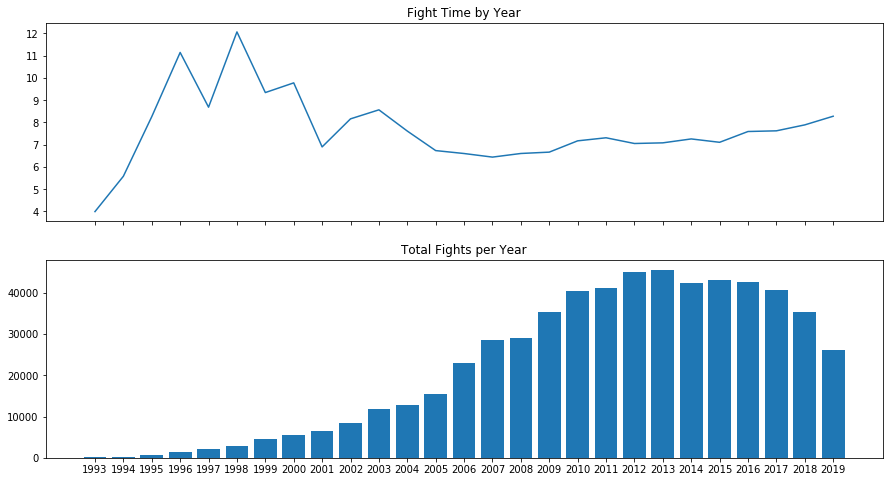

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.axes([1993, 1995, 2000, 2005, 2010, 2015, 2019])
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(15,8))
ax[0].plot(finish_history.AvgTime)
ax[0].title.set_text('Fight Time by Year')

ax[1].bar(finish_history.index, finish_history.Fights)
ax[1].title.set_text('Total Fights per Year')

#plt.tight_layout()
plt.show()

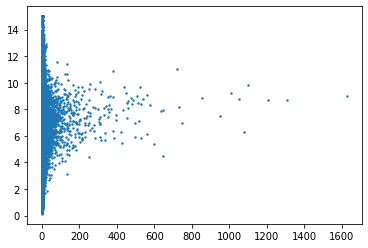

In [14]:
plt.scatter(ref_summary['Fights'], ref_summary['AvgTime'], s=2)
plt.show()